In [313]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [314]:
data = pd.read_csv('OldFaithfulData.csv')
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [315]:
df = (data - data.mean())/data.std()
df

,eruptions,waiting
0,0.098318,0.596025
1,-1.478733,-1.242890
2,-0.135612,0.228242
3,-1.055558,-0.654437
4,0.915755,1.037364
...,...,...
267,0.551282,0.743138
268,-1.172084,-1.831343
269,0.814123,1.405147
270,-1.463838,-1.831343


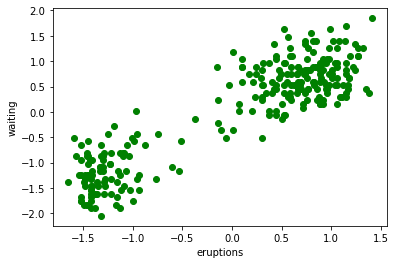

In [316]:
plt.scatter(df["eruptions"],df["waiting"],color = "green")
plt.xlabel("eruptions")
plt.ylabel("waiting")
plt.show()

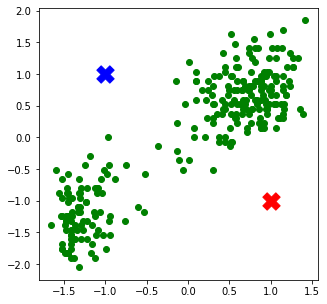

In [317]:
#number of clusters
num = 1
J = {}
count = 0
k = 2
centroids = {1:[1,-1],2:[-1,1]}
fig = plt.figure(figsize=(5, 5))
plt.scatter(df["eruptions"],df["waiting"],color = 'g')
colmap = {1:'r',2:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i] , marker = 'X' , s = 300)
fig.savefig('figure_{}.pdf'.format(num), dpi=fig.dpi)  
num+=1
plt.show()


   eruptions   waiting  distance_from_1  distance_from_2  closest color
0   0.098318  0.596025         1.833119         1.170255        2     b
1  -1.478733 -1.242890         2.490605         2.293413        2     b
2  -0.135612  0.228242         1.672780         1.158783        2     b
3  -1.055558 -0.654437         2.084402         1.655370        2     b
4   0.915755  1.037364         2.039105         1.916120        2     b


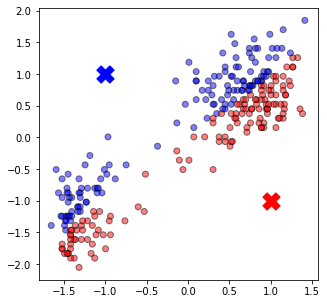

In [318]:
#assignment stage
def assignment(df, centroids):
    global count
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (np.sqrt((df['eruptions'] - centroids[i][0]) ** 2
                                                    + (df['waiting'] - centroids[i][1]) ** 2))
    
    error = {count:df[["distance_from_1","distance_from_2"]].min(axis = 1).sum()}
    J.update(error)
    count+=1
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['eruptions'], df['waiting'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
     plt.scatter(*centroids[i], color=colmap[i] ,marker='X',s = 300)
plt.show()
fig.savefig('figure_{}.pdf'.format(num), dpi=fig.dpi)  
num+=1

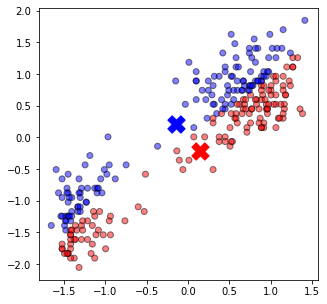

In [319]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['eruptions'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['waiting'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['eruptions'], df['waiting'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i] , marker = 'X' , s =300)
fig.savefig('figure_{}.pdf'.format(num), dpi=fig.dpi)  
num+=1
plt.show()

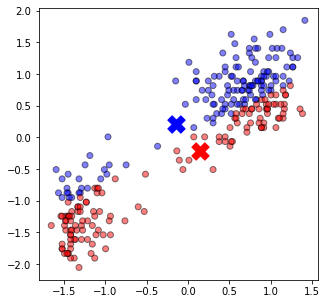

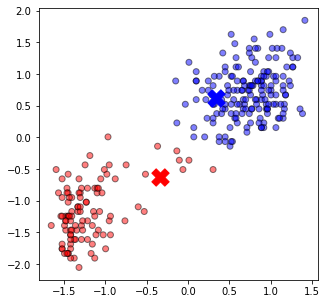

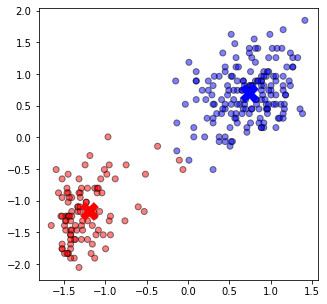

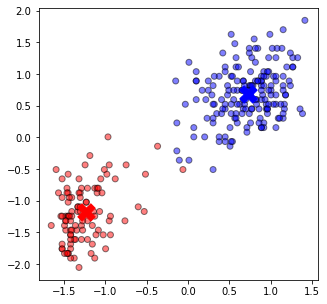

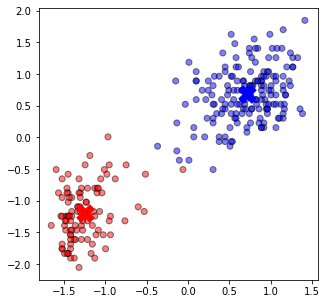

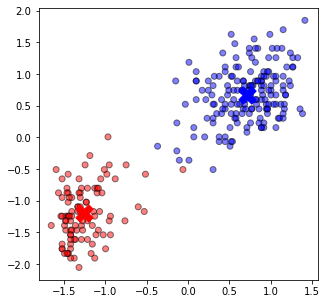

     eruptions   waiting  distance_from_1  distance_from_2  closest color
0     0.098318  0.596025         2.249969         0.615235        2     b
1    -1.478733 -1.242890         0.225213         2.909254        1     r
2    -0.135612  0.228242         1.815839         0.955192        2     b
3    -1.055558 -0.654437         0.581228         2.209133        1     r
4     0.915755  1.037364         3.118833         0.417065        2     b
..         ...       ...              ...              ...      ...   ...
267   0.551282  0.743138         2.654419         0.171057        2     b
268  -1.172084 -1.831343         0.637768         3.133763        1     r
269   0.814123  1.405147         3.328088         0.737268        2     b
270  -1.463838 -1.831343         0.664735         3.317057        1     r
271   0.857930  0.228242         2.552295         0.471593        2     b

[272 rows x 6 columns]


In [321]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(df['eruptions'], df['waiting'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i] , marker = 'X' , s = 300)
    plt.show()
    fig.savefig('figure_{}.pdf'.format(num), dpi=fig.dpi)  
    num+=1
    if closest_centroids.equals(df['closest']):
        break

print(df)


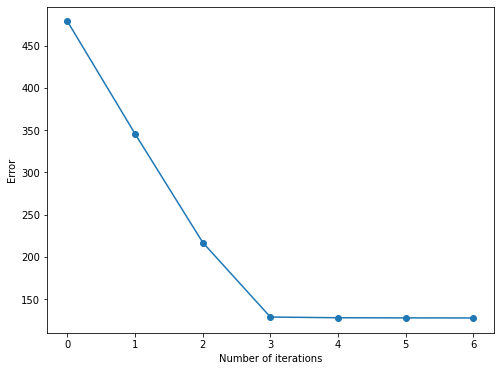

In [322]:
#plot error vs iteration
fig = plt.figure(figsize=(8, 6))
plt.plot(list(J.keys()),list(J.values()))
plt.scatter(list(J.keys()),list(J.values()))
plt.ylabel("Error")
plt.xlabel("Number of iterations")
plt.show()
fig.savefig('figure_{}.pdf'.format(num), dpi=fig.dpi)  
num+=1